## Importando Bibliotecas

In [30]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt


### Requisição API e Exibição da resposta em json

In [3]:
data = requests.get('https://rickandmortyapi.com/api/character')
response = data.json()
print(response)

{'info': {'count': 826, 'pages': 42, 'next': 'https://rickandmortyapi.com/api/character?page=2', 'prev': None}, 'results': [{'id': 1, 'name': 'Rick Sanchez', 'status': 'Alive', 'species': 'Human', 'type': '', 'gender': 'Male', 'origin': {'name': 'Earth (C-137)', 'url': 'https://rickandmortyapi.com/api/location/1'}, 'location': {'name': 'Citadel of Ricks', 'url': 'https://rickandmortyapi.com/api/location/3'}, 'image': 'https://rickandmortyapi.com/api/character/avatar/1.jpeg', 'episode': ['https://rickandmortyapi.com/api/episode/1', 'https://rickandmortyapi.com/api/episode/2', 'https://rickandmortyapi.com/api/episode/3', 'https://rickandmortyapi.com/api/episode/4', 'https://rickandmortyapi.com/api/episode/5', 'https://rickandmortyapi.com/api/episode/6', 'https://rickandmortyapi.com/api/episode/7', 'https://rickandmortyapi.com/api/episode/8', 'https://rickandmortyapi.com/api/episode/9', 'https://rickandmortyapi.com/api/episode/10', 'https://rickandmortyapi.com/api/episode/11', 'https://ri

### Salvando o Titulo de Nível results

In [27]:
characters = response['results']



###  Normalização e Extração de Dados com json_normalize

In [8]:
characters_rickemorty = pd.json_normalize(characters,meta = ['name','status','type','gender'])


Index(['id', 'name', 'status', 'species', 'type', 'gender', 'image', 'episode',
       'url', 'created', 'origin.name', 'origin.url', 'location.name',
       'location.url'],
      dtype='object')

### Renomeando Colunas

In [12]:
characters_rickemorty.rename(columns = {'origin.name': 'origin',
                                       'location.name':'location'},inplace=True)

### Retirando o T da coluna de data

In [17]:
characters_rickemorty['created'] = characters_rickemorty['created'].str.replace('T',' ')                                            

### Ajuste correto de data e conversão para datatetime

In [ ]:
characters_rickemorty['created'] = characters_rickemorty['created'].str[0:19]
characters_rickemorty['created'] = pd.to_datetime(characters_rickemorty['created'],format = '%Y-%m-%d %H:%M:%S')

### Realizando o agrupamento para analise e filtragem dos dados de analise

In [40]:
characters_filtrado = characters_rickemorty[(characters_rickemorty['gender'] != 'unknown') & (characters_rickemorty['status'] != 'unknown')]
agrup = characters_filtrado.groupby(['gender','status']).agg(Personagens_Quantidade = ('id','size'))
agrup

Personagens_Quantidade
gender status                        
Female Alive                        4
Male   Alive                        4
       Dead                         6

### Resetando o index para analise em grafico

In [41]:
agrup = agrup.reset_index()

### Plotagem de gráfico de barras para uma analise detalhada

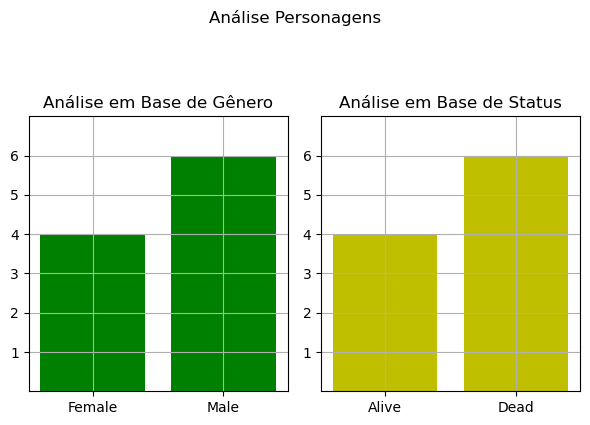

In [117]:
rick_morty = plt.figure(figsize=(6, 4))

plt.suptitle('Análise Personagens', y=1.05)

rick_morty.add_subplot(1, 2, 1)
plt.title('Análise em Base de Gênero')
plt.bar(agrup['gender'], agrup['Personagens_Quantidade'], color='g')
plt.ylim(0, 7)
plt.yticks([1, 2, 3, 4, 5, 6])
plt.grid()

rick_morty.add_subplot(1, 2, 2)
plt.title('Análise em Base de Status')
plt.bar(agrup['status'], agrup['Personagens_Quantidade'], color='y')
plt.ylim(0, 7)
plt.yticks([1, 2, 3, 4, 5, 6])
plt.grid()

plt.subplots_adjust(wspace=2, top=0.85)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.savefig('Analise_Personagens.png', bbox_inches='tight')

plt.show()
